Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorous solutions! Please include your code at
the end of your submission, or in a separate file. We also accept incomplete solutions.
## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.
## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).
Data description
● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYYMMDD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import json
%matplotlib inline

## Part1 

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
df1 = pd.read_json('logins.json')
pd.set_option('display.max_rows', None)

In [3]:
df1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df1.shape

(93142, 1)

In [5]:
# make sure no missing data
df1.isnull().sum()

login_time    0
dtype: int64

In [6]:
# check data type
df1.dtypes

login_time    datetime64[ns]
dtype: object

In [7]:
#df1.login_time = pd.to_datetime(df1.login_time)

In [8]:
pd.Index(df1.login_time).is_monotonic_increasing

False

<b>Issue1: login_time Year starts from 1970 in original data</b>
<br><b>Issue2: login_time is not sorted in ascending order in original data</b>

In [9]:
df1 = df1.sort_values('login_time', ascending=True)

In [10]:
df1.head(10)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
5,1970-01-01 20:21:41
10,1970-01-01 20:26:05
4,1970-01-01 20:26:21
11,1970-01-01 20:31:03
12,1970-01-01 20:34:46


In [11]:
# make sure date is all sorted in ascending order
pd.Index(df1.login_time).is_monotonic_increasing

True

In [12]:
# create a new column 'count' in df1 and assing value 1 to it
df1['count']=1

In [13]:
df1.head(20)

,login_time,count
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1
5,1970-01-01 20:21:41,1
10,1970-01-01 20:26:05,1
4,1970-01-01 20:26:21,1
11,1970-01-01 20:31:03,1
12,1970-01-01 20:34:46,1


In [14]:
df1= df1.set_index('login_time')

In [15]:
df1_15t = pd.DataFrame(df1.resample('15T')['count'].sum())

In [16]:
df1_15t.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


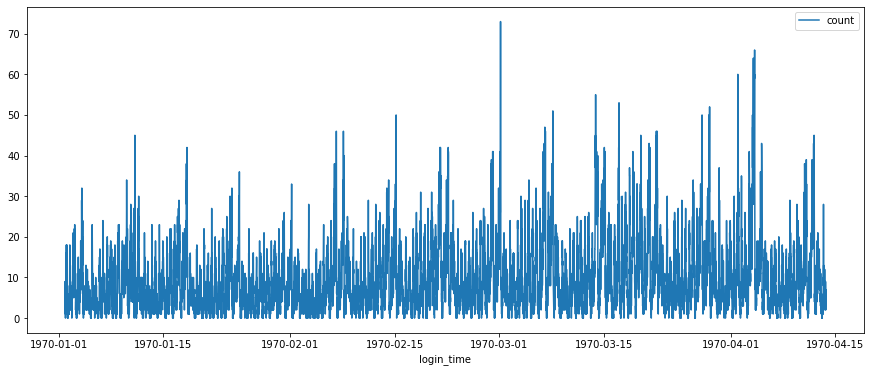

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=df1_15t)
plt.show()

In [19]:
# check if df1_15t is stationary 

from statsmodels.tsa.stattools import adfuller

result = adfuller(df1_15t)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.337954
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


As the statistic value -10.34 is less than all the critical values, meaning we can reject the null hypothesis and in turn that the time series is stationary

## Check hourly trend for login count   

In [20]:
df1_h = pd.DataFrame(df1.resample('H')['count'].sum())

In [21]:
df1_h['hourOfday'] = df1_h.index.hour

In [22]:
df1_h.head(5)

,count,hourOfday
login_time,,
1970-01-01 20:00:00,24,20
1970-01-01 21:00:00,9,21
1970-01-01 22:00:00,21,22
1970-01-01 23:00:00,58,23
1970-01-02 00:00:00,53,0


data starts from 1/1 20:00

In [23]:
df1_h.tail()

,count,hourOfday
login_time,,
1970-04-13 14:00:00,32,14
1970-04-13 15:00:00,19,15
1970-04-13 16:00:00,22,16
1970-04-13 17:00:00,22,17
1970-04-13 18:00:00,20,18


data ends on 4/13 18:00 

In [24]:
df1_h.groupby('hourOfday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
hourOfday,,,,,,,,
0,102.0,58.754902,26.689426,14.0,41.00,55.0,72.00,173.0
1,102.0,61.931373,36.550050,16.0,35.00,52.5,80.75,237.0
2,102.0,56.862745,39.672930,10.0,27.00,44.0,88.00,157.0
3,102.0,47.362745,43.286243,4.0,16.25,28.0,70.00,153.0
4,102.0,49.352941,54.485469,4.0,13.00,20.5,77.50,205.0
5,102.0,28.872549,34.566816,2.0,7.00,12.5,47.50,226.0
6,102.0,11.156863,12.741718,1.0,4.00,6.0,16.75,91.0
7,102.0,7.990196,5.096097,2.0,5.00,7.0,10.00,38.0
8,102.0,8.019608,4.209796,0.0,5.00,7.0,10.00,27.0


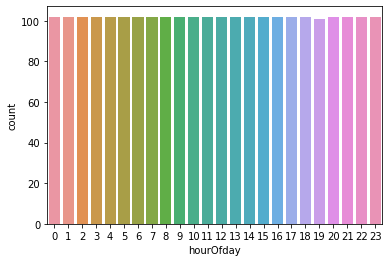

In [25]:
sns.countplot(df1_h['hourOfday'])
plt.show()

As data starts from 1/1 20:00 and ends at 4/13 18:00 therefore 19:00 has 1 hour less than other hours in terms of total count

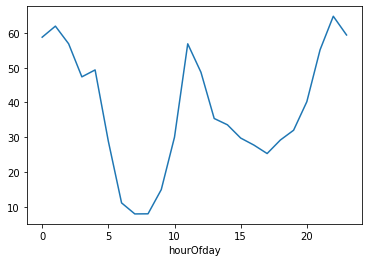

In [26]:
df1_h.groupby('hourOfday')['count'].mean().plot()
#plt.xticks(np.arange(0,24,1))
plt.show()

we can see the hourly login drops after 1am, reaches a minimum around 6am, start increasing from 7am~ 11am, drop again during 11am ~ 5pm. 
increase again from 6pm and hit maximum around 10pm. A cyclic behavior with a period of about 8 hours. 

## Check DayofWeek trend for login count

In [27]:
df1_D = pd.DataFrame(df1.resample('D')['count'].sum())

In [28]:
df1_D['dayOfweek']= df1_D.index.weekday+1

In [29]:
df1_D.head()

,count,dayOfweek
login_time,,
1970-01-01,112,4
1970-01-02,681,5
1970-01-03,793,6
1970-01-04,788,7
1970-01-05,459,1


Data starts from Thursday

In [30]:
df1_D.tail()

,count,dayOfweek
login_time,,
1970-04-09,818,4
1970-04-10,1009,5
1970-04-11,1352,6
1970-04-12,1409,7
1970-04-13,395,1


Ends on Monday 

In [31]:
df1_D.groupby('dayOfweek').describe()

count                                                           \
          count         mean         std    min      25%     50%     75%   
dayOfweek                                                                  
1          15.0   588.200000  118.806686  395.0   491.50   599.0   645.0   
2          14.0   662.000000  203.606332  464.0   543.25   616.0   708.0   
3          14.0   738.500000  189.248615  467.0   650.25   720.5   777.0   
4          15.0   797.333333  288.727174  112.0   649.50   827.0   893.5   
5          15.0  1013.866667  218.635661  681.0   863.00  1009.0  1141.0   
6          15.0  1291.800000  335.041405  793.0  1059.00  1352.0  1486.5   
7          15.0  1211.133333  262.104359  788.0   992.50  1262.0  1432.0   

                   
              max  
dayOfweek          
1           837.0  
2          1290.0  
3          1212.0  
4          1444.0  
5          1504.0  
6          1889.0  
7          1565.0

As data starts from Thursday and ends on Monday so Tuesday and Wednesday are one day less than the other days in terms of the total count

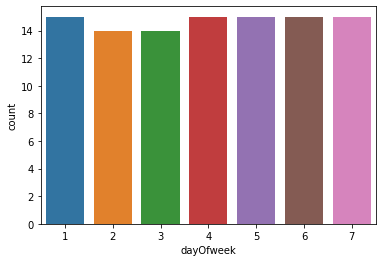

In [32]:
sns.countplot(df1_D['dayOfweek'])
plt.show()

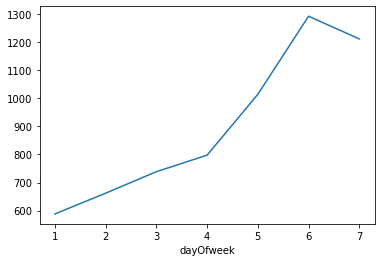

In [33]:
df1_D.groupby('dayOfweek')['count'].mean().plot()
plt.show()

We can see login increase from Thursday of the week and hits maximum on Saturday

## Check daily trend

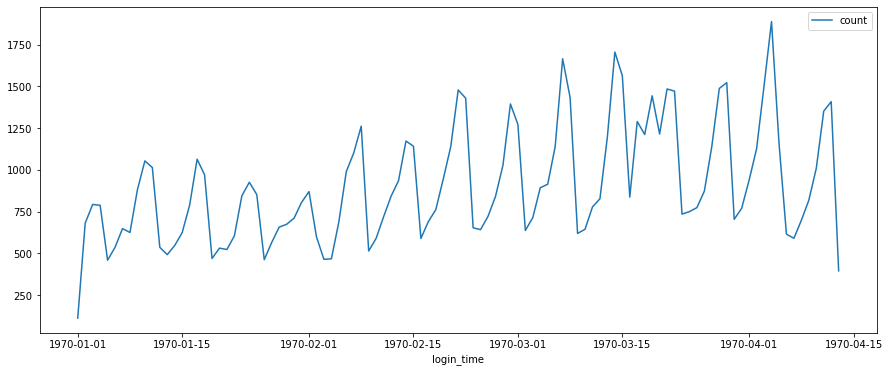

In [34]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=df1_D.drop('dayOfweek', axis=1))
plt.show()

When look at daily trend, the plot suggests some cyclic behavior with an interval of about 6~7 days: Demands hit peak around weekend and decline during weekdays.

In [35]:
# check if daily data is stationary

result = adfuller(df1_D['count'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.403316
p-value: 0.580685
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584


As the statistic value -1.40 is bigger than all the critical values, meaning we fail to reject the null hypothesis and in turn that the time series is non-stationary

## Check weekly trend for login count

In [36]:
df1_W = pd.DataFrame(df1.resample('W')['count'].sum())

In [123]:
print('number of weeks:', len(df1_W))
df1_W

number of weeks: 16


,count
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744
1970-02-08,5572
1970-02-15,5915
1970-02-22,7035
1970-03-01,6554


for week 4/19 we only have one day data of 4/13 from 0:00 to 18:00

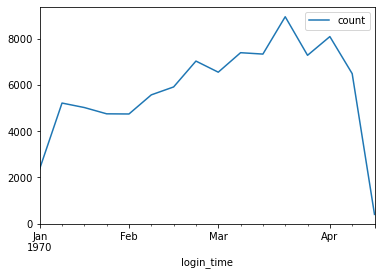

In [38]:
df1_W.plot()
plt.show()

we can see an upward trend in login from Jan towards the first week of April, hit a maximum around the 4th week in March

### check login count by weekday_hour 

In [54]:
df1_h_w = df1_h.assign(weekOfday=df1_h.index.weekday+1)

In [60]:
df1_h_w = df1_h_w.groupby(['weekOfday', 'hourOfday'])['count'].sum().reset_index()

In [121]:
df1_h_w.nlargest(10, 'count')

,weekOfday,hourOfday,count
148,7,4,2107
124,6,4,1719
147,7,3,1647
122,6,2,1608
146,7,2,1608
123,6,3,1574
121,6,1,1562
118,5,22,1519
145,7,1,1355
119,5,23,1298


if we check the login break down by weekday and hour, we can see weekends around 3 ~ 4 am is the peak of demand.
<br>This trend is different from the hourly break down we checked previously. Suggesting weekday and weekend may have different peak time. 
<br>Therefore we checked the weekday_hour trend as below:

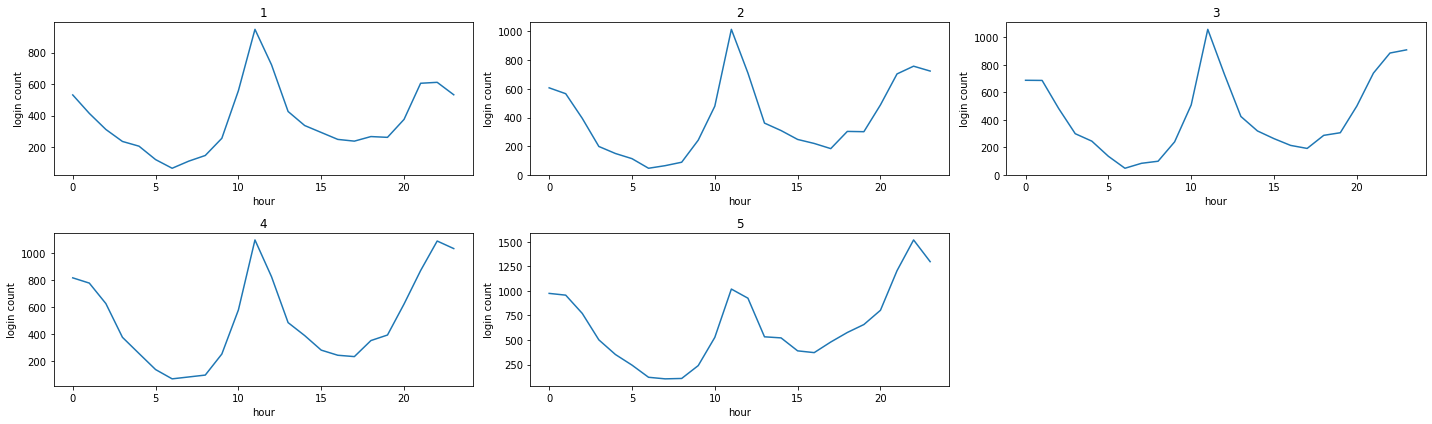

In [114]:
weekend = [6,7]
plt.figure(figsize=(20,6))
for i, day in enumerate(df1_h_w.weekOfday.unique(),1):
    if day not in weekend:
        #print(day)
        plt.subplot(2,3,i)
        plt.plot(df1_h_w.loc[df1_h_w['weekOfday']==day].hourOfday, df1_h_w.loc[df1_h_w['weekOfday']==day]['count'])
        plt.xlabel('hour')
        plt.ylabel('login count')
        plt.title(day)
plt.tight_layout()


compare it with weekend trend:

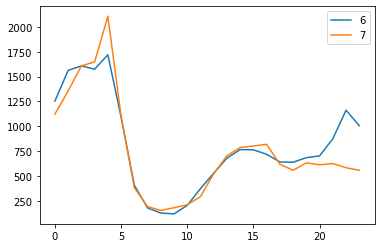

In [120]:
plt.plot(df1_h_w.loc[df1_h_w['weekOfday'] == 6].hourOfday, df1_h_w.loc[df1_h_w['weekOfday'] == 6]['count'] )
plt.plot(df1_h_w.loc[df1_h_w['weekOfday'] == 7].hourOfday, df1_h_w.loc[df1_h_w['weekOfday'] == 7]['count'] )
plt.legend([6,7])
plt.show()

## Part1 summary: 
- When look at daily trend, the plot suggests some cyclic behavior with a period of about 6~7 days. 
  Demands hit peak around weekend and decline during weekdays. 
- When look at weekly cycle, login increase from Thursday and hits maximum on Saturday.
- Druing weekday, demands have 2 peaks, first one is around 11am and second one is around 10pm.
- During weekend, demands have 1 peak around 3 ~ 4 am

## Part2

Experiment and metrics design The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a. how you will implement the experiment b. what statistical test(s) you will conduct to verify the significance of the observation c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Answer: 

In [39]:
df2 = pd.read_json('ultimate_data_challenge.json')

In [126]:
df2.head(20)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0
